In [1]:
using JLD2, CairoMakie, StatsBase
using Jchemo, JchemoData

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data", "iris.jld2")
@load db dat

1-element Vector{Symbol}:
 :dat

In [3]:
pnames(dat)

(:X,)

In [4]:
summ(dat.X)

(res = 5×7 DataFrame
 Row │ variable      mean    std     min     max        n      nmissing 
     │ Symbol        Union…  Union…  Any     Any        Int64  Int64    
─────┼──────────────────────────────────────────────────────────────────
   1 │ sepal_length  5.843   0.828   4.3     7.9          150         0
   2 │ sepal_width   3.057   0.436   2.0     4.4          150         0
   3 │ petal_length  3.758   1.765   1.0     6.9          150         0
   4 │ petal_width   1.199   0.762   0.1     2.5          150         0
   5 │ species                       setosa  virginica    150         0, ntot = 150)

In [5]:
X = dat.X[:, 1:4]
y = dat.X[:, 5]
n = nro(X)

150

In [6]:
@head(X)

... (150, 4)
 


Row,sepal_length,sepal_width,petal_length,petal_width
,Float64,Float64,Float64,Float64
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2


In [7]:
tab(y)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "setosa"     => 50
  "versicolor" => 50
  "virginica"  => 50

In [8]:
ntrain = 120
s = sample(1:n, ntrain; replace = false)
Xtrain = X[s, :]
ytrain = y[s]
Xtest = rmrow(X, s)
ytest = rmrow(y, s)

30-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "versicolor"
 "versicolor"
 "versicolor"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [9]:
tab(ytrain)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "setosa"     => 43
  "versicolor" => 38
  "virginica"  => 39

In [10]:
tab(ytest)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "setosa"     => 7
  "versicolor" => 12
  "virginica"  => 11

In [11]:
fm = fda(Xtrain, ytrain; nlv = 2) ;
#fm = fdasvd(Xtrain, ytrain; nlv = 2) ;
pnames(fm)

(:T, :P, :Tcenters, :eig, :sstot, :W, :xmeans, :xscales, :lev, :ni)

In [12]:
lev = fm.lev

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

In [13]:
nlev = length(lev)

3

In [14]:
fm.T

120×2 Matrix{Float64}:
 -5.24746     2.18609
 -2.45125    -0.218177
 -0.632196    1.67022
  0.0358564   1.38069
  6.32219    -1.26154
  5.60297     2.23908
 -6.82889     1.29527
 -6.67211    -1.86303
 -2.41741     0.325132
 -3.77825     1.80146
  ⋮          
  8.23002    -0.71412
  8.5629     -0.901314
 -3.00876     0.0766301
  7.60253    -1.59079
 -2.72943    -0.0495602
 -2.0697      0.373917
 -6.45903     0.0600388
  8.66734    -0.371845
  6.60964     0.557758

In [15]:
# Class centers projected on the score space
ct = fm.Tcenters

3×2 Matrix{Float64}:
  7.4776   -0.183205
 -2.18804   0.71789
 -6.11259  -0.497487

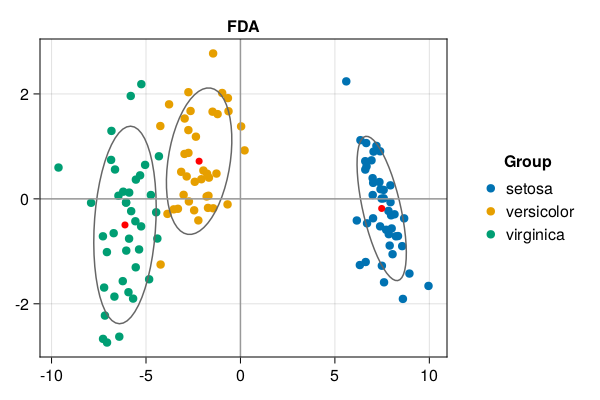

In [16]:
f, ax = plotxy(fm.T[:, 1:2], ytrain;
    ellipse = true, title = "FDA", zeros = true)
scatter!(ax, ct[:, 1], ct[:, 2],
    markersize = 10, color = :red)
f

In [17]:
# Projection of Xtest to the score space
Ttest = Jchemo.transform(fm, Xtest)

30×2 Matrix{Float64}:
  7.19731   1.16986
  9.14094  -2.95752
  7.88956  -1.24467
  6.25431   0.310339
  6.57866   0.80793
  9.40827  -2.0071
  6.74389   0.794627
 -2.14209  -0.636966
 -2.87127  -1.00418
 -2.07338   0.737522
  ⋮        
 -7.29477  -3.06088
 -6.22628  -2.20554
 -5.59354  -0.176872
 -8.06744   0.774414
 -4.53792  -0.672175
 -7.01941  -0.438635
 -7.04596  -1.98283
 -5.31586  -2.09234
 -7.2819   -1.71024

In [18]:
# X-loadings matrix
# Columns of P = coefficients of the linear discriminant function
# = "LD" of function lda of package MASS
fm.P

4×2 Matrix{Float64}:
  1.10536   0.0527419
  1.41509  -2.44898
 -2.49627   0.790344
 -2.60896  -2.75106

In [19]:
fm.P' * fm.P    # not orthogonal

2×2 Matrix{Float64}:
 16.2624    1.79729
  1.79729  14.1933

In [20]:
fm.eig

4-element Vector{Float64}:
 33.695269002687645
  0.25566173774668627
 -3.8265486300599277e-16
 -3.8265486300599277e-16

In [21]:
fm.sstot

33.95093074043433

In [22]:
# Explained variance by PCA of the class centers
# in transformed scale
summary(fm)

(explvarx = 2×4 DataFrame
 Row │ lv     var        pvar        cumpvar 
     │ Int64  Float64    Float64     Float64 
─────┼───────────────────────────────────────
   1 │     1  33.6953    0.99247     0.99247
   2 │     2   0.255662  0.00753033  1.0,)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*